In [16]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [18]:
df = pd.read_csv("../Python/Output/PolyNearOne.txt", sep='\t')
df.head()

,X,Order,Reminder,Value Error,Uncertainty,Result ULP,Power,ULP Power,Rouding Error,Accumulated Rounding Error
0,0.5,1,-0.50000,-0.50000,2.719479e-16,2.220446e-16,0.50000,0.50000,0.0,0.0
1,0.5,2,-0.25000,-0.25000,2.954803e-16,2.220446e-16,0.25000,0.25000,0.0,0.0
2,0.5,3,-0.12500,-0.12500,3.196908e-16,2.220446e-16,0.12500,0.12500,0.0,0.0
3,0.5,4,-0.06250,-0.06250,3.385147e-16,2.220446e-16,0.06250,0.06250,0.0,0.0
4,0.5,5,-0.03125,-0.03125,3.512194e-16,2.220446e-16,0.03125,0.03125,0.0,0.0


In [37]:
def PlotReminderUncertainty(minOrder=0, maxOrder=125, ylim=[], showUncertainty=False):
    fig, ax = plt.subplots()
    ax.set_title(r'Taylor Expansion Reminders for $\frac{1}{1 - x}$')
    ax.set_xlabel('Taylor Expansion Order N')
    ax.set_ylabel('Absolute Reminder')
    ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)

    for x, color, sUlp in zip((0.6, 0.7, -0.6, -0.7), ('g', 'b', 'm', 'c'), [(75, 80, 85), (105, 110, 115)]*2):   
        dfPlot = df[(df['X']==x) & (df['Order']>=minOrder) & (df['Order']<=maxOrder) & (df['Order'].isin(sUlp))]
        ax.plot(dfPlot['Order'], dfPlot['Result ULP'], color+'o', label=f'{x} Expansion LSV')
        if not showUncertainty:
            ax.plot(dfPlot['Order'], dfPlot['Result ULP']*0.5, color+'x', label=f'{x} 1/2 Expansion LSV')
        dfPlot = df[(df['X']==x) & (df['Order']>=minOrder) & (df['Order']<=maxOrder)]
        ax.plot(dfPlot['Order'], np.abs(dfPlot['Reminder']), color+'-', label=f'{x} Reminder Value')
        if showUncertainty:
            ax.plot(dfPlot['Order'], dfPlot['Uncertainty'], color+'-.', label=f'{x} Expansion Uncertainty')
        else:
            if x > 0:
                ax.plot(dfPlot['Order'], np.abs(dfPlot['Power']), color+'--', label=f'{x} $|x|^N$')
            ax.plot(dfPlot['Order'], np.abs(dfPlot['Accumulated Rounding Error']), color+':', 
                    label=f'{x} Accumulated Rounding Error')
        
    ax.legend(bbox_to_anchor=(1.0, 1.0))

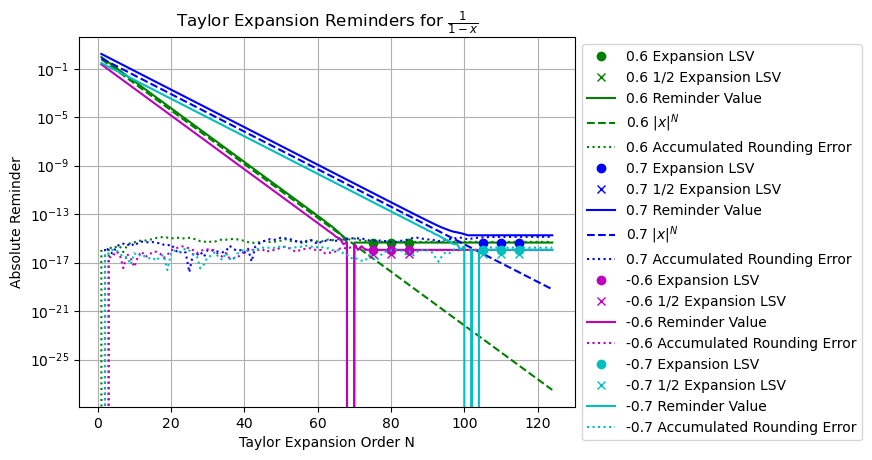

In [38]:
PlotReminderUncertainty()

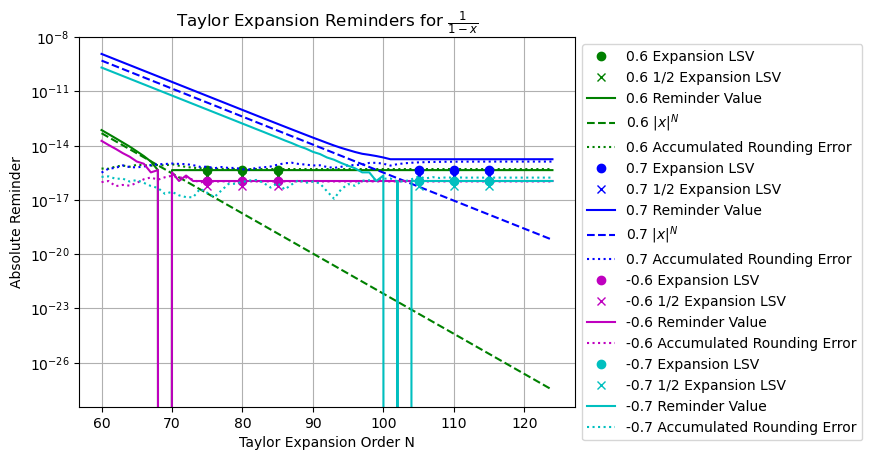

In [39]:
PlotReminderUncertainty(minOrder=60)

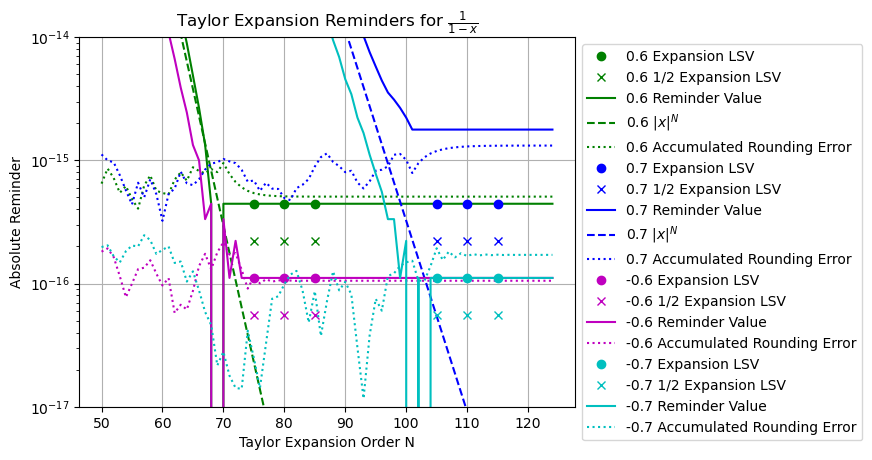

In [40]:
PlotReminderUncertainty(minOrder=50, ylim=(1e-17,1e-14))

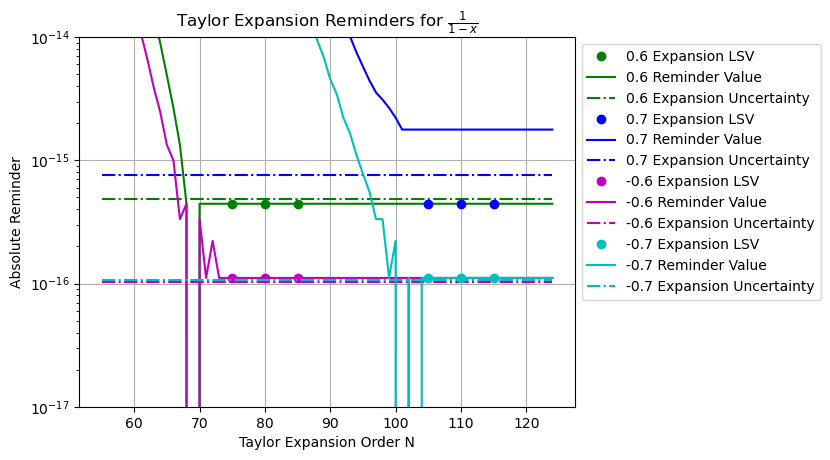

In [41]:
PlotReminderUncertainty(minOrder=55, ylim=(1e-17,1e-14), showUncertainty=True)

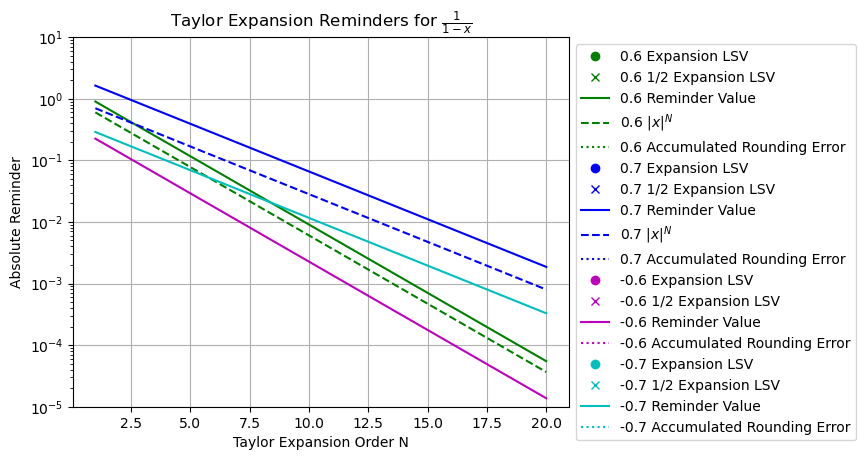

In [42]:
PlotReminderUncertainty(maxOrder=20, ylim=(1e-5, 10))

# Reach the end

In [25]:
df[(df['X']==0.6) & (df['Order']>=65) & (df['Order']<=75)].head(10)

,X,Order,Reminder,Value Error,Uncertainty,Result ULP,Power,ULP Power,Rouding Error,Accumulated Rounding Error
560,0.6,65,-4.884981e-15,-4.884981e-15,4.816320e-16,4.440892e-16,3.800417e-15,3.996803e-15,-1.963857e-16,-8.789001e-16
561,0.6,66,-2.664535e-15,-2.664535e-15,4.816320e-16,4.440892e-16,2.280250e-15,2.220446e-15,5.980427e-17,-8.190958e-16
562,0.6,67,-1.332268e-15,-1.332268e-15,4.816320e-16,4.440892e-16,1.368150e-15,1.332268e-15,3.588256e-17,-7.832133e-16
563,0.6,68,-4.440892e-16,-4.440892e-16,4.816320e-16,4.440892e-16,8.208901e-16,8.881784e-16,-6.728830e-17,-8.505016e-16
564,0.6,69,0.000000e+00,0.000000e+00,4.816320e-16,4.440892e-16,4.925341e-16,4.440892e-16,4.844486e-17,-8.020567e-16
565,0.6,70,4.440892e-16,4.440892e-16,4.816320e-16,4.440892e-16,2.955204e-16,4.440892e-16,-1.485688e-16,-9.506255e-16
566,0.6,71,4.440892e-16,4.440892e-16,4.816320e-16,4.440892e-16,1.773123e-16,0.000000e+00,1.773123e-16,-7.733132e-16
567,0.6,72,4.440892e-16,4.440892e-16,4.816320e-16,4.440892e-16,1.063874e-16,0.000000e+00,1.063874e-16,-6.669259e-16
568,0.6,73,4.440892e-16,4.440892e-16,4.816320e-16,4.440892e-16,6.383242e-17,0.000000e+00,6.383242e-17,-6.030934e-16
569,0.6,74,4.440892e-16,4.440892e-16,4.816320e-16,4.440892e-16,3.829945e-17,0.000000e+00,3.829945e-17,-5.647940e-16


In [26]:
df[(df['X']==0.7) & (df['Order']>=100) & (df['Order']<=106)].head(10)

,X,Order,Reminder,Value Error,Uncertainty,Result ULP,Power,ULP Power,Rouding Error,Accumulated Rounding Error
1091,0.7,100,-2.220446e-15,-2.220446e-15,7.614589e-16,4.440892e-16,3.234477e-16,4.440892e-16,-1.206416e-16,1.006795e-15
1092,0.7,101,-1.776357e-15,-1.776357e-15,7.614589e-16,4.440892e-16,2.264134e-16,4.440892e-16,-2.176759e-16,7.891192e-16
1093,0.7,102,-1.776357e-15,-1.776357e-15,7.614589e-16,4.440892e-16,1.584893e-16,0.000000e+00,1.584893e-16,9.476086e-16
1094,0.7,103,-1.776357e-15,-1.776357e-15,7.614589e-16,4.440892e-16,1.109425e-16,0.000000e+00,1.109425e-16,1.058551e-15
1095,0.7,104,-1.776357e-15,-1.776357e-15,7.614589e-16,4.440892e-16,7.765978e-17,0.000000e+00,7.765978e-17,1.136211e-15
1096,0.7,105,-1.776357e-15,-1.776357e-15,7.614589e-16,4.440892e-16,5.436185e-17,0.000000e+00,5.436185e-17,1.190573e-15
1097,0.7,106,-1.776357e-15,-1.776357e-15,7.614589e-16,4.440892e-16,3.805329e-17,0.000000e+00,3.805329e-17,1.228626e-15


In [27]:
df[(df['X']==-0.6) & (df['Order']>=63) & (df['Order']<=73)].head(10)

,X,Order,Reminder,Value Error,Uncertainty,Result ULP,Power,ULP Power,Rouding Error,Accumulated Rounding Error
682,-0.6,63,-3.885781e-15,-3.885781e-15,1.023457e-16,1.110223e-16,-1.055671e-14,-1.054712e-14,-9.595710e-18,-6.726625e-17
683,-0.6,64,2.442491e-15,2.442491e-15,1.023457e-16,1.110223e-16,6.334029e-15,6.328271e-15,5.757426e-18,-6.150883e-17
684,-0.6,65,-1.332268e-15,-1.332268e-15,1.023457e-16,1.110223e-16,-3.800417e-15,-3.774758e-15,-2.565892e-17,-8.716774e-17
685,-0.6,66,9.992007e-16,9.992007e-16,1.023457e-16,1.110223e-16,2.280250e-15,2.331468e-15,-5.121803e-17,-1.383858e-16
686,-0.6,67,-3.330669e-16,-3.330669e-16,1.023457e-16,1.110223e-16,-1.368150e-15,-1.332268e-15,-3.588256e-17,-1.742683e-16
687,-0.6,68,4.440892e-16,4.440892e-16,1.023457e-16,1.110223e-16,8.208901e-16,7.771561e-16,4.373400e-17,-1.305343e-16
688,-0.6,69,0.000000e+00,0.000000e+00,1.023457e-16,1.110223e-16,-4.925341e-16,-4.440892e-16,-4.844486e-17,-1.789792e-16
689,-0.6,70,3.330669e-16,3.330669e-16,1.023457e-16,1.110223e-16,2.955204e-16,3.330669e-16,-3.754647e-17,-2.165257e-16
690,-0.6,71,1.110223e-16,1.110223e-16,1.023457e-16,1.110223e-16,-1.773123e-16,-2.220446e-16,4.473234e-17,-1.717933e-16
691,-0.6,72,2.220446e-16,2.220446e-16,1.023457e-16,1.110223e-16,1.063874e-16,1.110223e-16,-4.634944e-18,-1.764283e-16


In [28]:
df[(df['X']==-0.7) & (df['Order']>=95) & (df['Order']<=105)].head(10)

,X,Order,Reminder,Value Error,Uncertainty,Result ULP,Power,ULP Power,Rouding Error,Accumulated Rounding Error
1210,-0.7,95,-7.771561e-16,-7.771561e-16,1.069968e-16,1.110223e-16,-1.924482e-15,-1.887379e-15,-3.710263e-17,-7.505496e-17
1211,-0.7,96,5.551115e-16,5.551115e-16,1.069968e-16,1.110223e-16,1.347137e-15,1.332268e-15,1.486961e-17,-6.018535e-17
1212,-0.7,97,-3.330669e-16,-3.330669e-16,1.069968e-16,1.110223e-16,-9.429961e-16,-8.881784e-16,-5.481765e-17,-1.150030e-16
1213,-0.7,98,3.330669e-16,3.330669e-16,1.069968e-16,1.110223e-16,6.600972e-16,6.661338e-16,-6.036568e-18,-1.210396e-16
1214,-0.7,99,-1.110223e-16,-1.110223e-16,1.069968e-16,1.110223e-16,-4.620681e-16,-4.440892e-16,-1.797886e-17,-1.390184e-16
1215,-0.7,100,2.220446e-16,2.220446e-16,1.069968e-16,1.110223e-16,3.234477e-16,3.330669e-16,-9.619256e-18,-1.486377e-16
1216,-0.7,101,0.000000e+00,0.000000e+00,1.069968e-16,1.110223e-16,-2.264134e-16,-2.220446e-16,-4.368751e-18,-1.530064e-16
1217,-0.7,102,1.110223e-16,1.110223e-16,1.069968e-16,1.110223e-16,1.584893e-16,1.110223e-16,4.746705e-17,-1.055394e-16
1218,-0.7,103,0.000000e+00,0.000000e+00,1.069968e-16,1.110223e-16,-1.109425e-16,-1.110223e-16,7.975818e-20,-1.054596e-16
1219,-0.7,104,1.110223e-16,1.110223e-16,1.069968e-16,1.110223e-16,7.765978e-17,1.110223e-16,-3.336252e-17,-1.388222e-16


In [29]:
df[(df['X']==-0.7) & (df['Order']>=95) & (df['Order']<=105)]\
    [['Order', 'Power', 'ULP Power', 'Reminder', 'Accumulated Rounding Error']].head(100)

,Order,Power,ULP Power,Reminder,Accumulated Rounding Error
1210,95,-1.924482e-15,-1.887379e-15,-7.771561e-16,-7.505496e-17
1211,96,1.347137e-15,1.332268e-15,5.551115e-16,-6.018535e-17
1212,97,-9.429961e-16,-8.881784e-16,-3.330669e-16,-1.150030e-16
1213,98,6.600972e-16,6.661338e-16,3.330669e-16,-1.210396e-16
1214,99,-4.620681e-16,-4.440892e-16,-1.110223e-16,-1.390184e-16
1215,100,3.234477e-16,3.330669e-16,2.220446e-16,-1.486377e-16
1216,101,-2.264134e-16,-2.220446e-16,0.000000e+00,-1.530064e-16
1217,102,1.584893e-16,1.110223e-16,1.110223e-16,-1.055394e-16
1218,103,-1.109425e-16,-1.110223e-16,0.000000e+00,-1.054596e-16
1219,104,7.765978e-17,1.110223e-16,1.110223e-16,-1.388222e-16


In [30]:
dfBad = 

SyntaxError: invalid syntax (3662664398.py, line 1)